In [26]:
import numpy as np
import torch.nn as nn
from my_dataset import MyDataset 
from voting_model import MyVoter, MyTrainedModel, MyNN, MyLinear
print("done")

done


In [27]:
train_filepath = "my_data/superfeatures1/train.csv"
test_filepath = "my_data/superfeatures1/test.csv"

train_loader = MyDataset.get_loader([train_filepath], shuffle=True, batch_size=16, num_workers=0)
test_loader = MyDataset.get_loader([test_filepath], batch_size=16, num_workers=0)

train_data = np.loadtxt(train_filepath, delimiter=",", skiprows=1) #redundatn ):
test_data  = np.loadtxt(test_filepath,  delimiter=",", skiprows=1)

train_y = train_data[:, -1].astype(int)
test_y = test_data[:, -1].astype(int)

train_X1 = train_data[:, :-1]
test_X1  = test_data[:, :-1]

train_X2 = train_data[:, 320:-1]
test_X2 = test_data[:, 320:-1]

train_X3 = train_data[:, 320:-321]
test_X3 = test_data[:, 320:-321]

num_classes = 9

In [28]:
"""
NN1: Full superfeatures shallow NN
"""
max_epochs = 8
model_name = "shallownn_full_superfeatures1"
num_features = train_loader.dataset.datasets[0].num_features
model_body = nn.Sequential(
    nn.Linear(num_features, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, num_classes))
loss_fn = nn.CrossEntropyLoss()
nn1 = MyNN(model_name, max_epochs, num_classes, num_features, model_body, loss_fn)
nn1.fit(train_loader)
print(model_name, " ", num_features)
print("done")

💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type             | Params | Mode 
--------------------------------------------------------
0 | model_body | Sequential       | 1.2 M  | train
1 | loss_fn    | CrossEntropyLoss | 0      | train
--------------------------------------------------------
1.2 M     Trainable params
0         Non-trainable params
1.2 M     Total params
4.862     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode
c:\Users\ericc\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:433: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Epoch 7: 100%|██████████| 808/808 [00:05<00:00, 139.18it/s, v_num=4, train_acc=1.000]

`Trainer.fit` stopped: `max_epochs=8` reached.


Epoch 7: 100%|██████████| 808/808 [00:05<00:00, 138.01it/s, v_num=4, train_acc=1.000]
Fit Time (s): 46.65100336074829
shallownn_full_superfeatures1   2112
done


In [29]:
"""
NN2: Full superfeatures deeper NN
"""
max_epochs = 8
model_name = "deepernn_full_superfeatures1"
num_features = train_loader.dataset.datasets[0].num_features
model_body = nn.Sequential(
    nn.Linear(num_features, 700),
    nn.ReLU(),
    nn.Linear(700, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, num_classes))
loss_fn = nn.CrossEntropyLoss()
nn2 = MyNN(model_name, max_epochs, num_classes, num_features, model_body, loss_fn)
nn2.fit(train_loader)
print(model_name, " ", num_features)
print("done")

💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type             | Params | Mode 
--------------------------------------------------------
0 | model_body | Sequential       | 2.0 M  | train
1 | loss_fn    | CrossEntropyLoss | 0      | train
--------------------------------------------------------
2.0 M     Trainable params
0         Non-trainable params
2.0 M     Total params
7.887     Total estimated model params size (MB)
9         Modules in train mode
0         Modules in eval mode


Epoch 7: 100%|██████████| 808/808 [00:06<00:00, 126.04it/s, v_num=3, train_acc=0.667]

`Trainer.fit` stopped: `max_epochs=8` reached.


Epoch 7: 100%|██████████| 808/808 [00:06<00:00, 124.27it/s, v_num=3, train_acc=0.667]
Fit Time (s): 52.55099868774414
deepernn_full_superfeatures1   2112
done


In [31]:
"""
NN3: Full superfeatures big NN
"""
max_epochs = 6
model_name = "bignn_full_superfeatures1"
num_features = train_loader.dataset.datasets[0].num_features
model_body = nn.Sequential(
    nn.Linear(num_features, 2048),
    nn.ReLU(),
    nn.Linear(2048, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, num_classes))
loss_fn = nn.CrossEntropyLoss()
nn3 = MyNN(model_name, max_epochs, num_classes, num_features, model_body, loss_fn)
nn3.fit(train_loader)
print(model_name, " ", num_features)
print("done")

💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type             | Params | Mode 
--------------------------------------------------------
0 | model_body | Sequential       | 5.5 M  | train
1 | loss_fn    | CrossEntropyLoss | 0      | train
--------------------------------------------------------
5.5 M     Trainable params
0         Non-trainable params
5.5 M     Total params
22.041    Total estimated model params size (MB)
9         Modules in train mode
0         Modules in eval mode


Epoch 5: 100%|██████████| 808/808 [00:06<00:00, 131.08it/s, v_num=1, train_acc=0.667]

`Trainer.fit` stopped: `max_epochs=6` reached.


Epoch 5: 100%|██████████| 808/808 [00:06<00:00, 126.88it/s, v_num=1, train_acc=0.667]
Fit Time (s): 39.51026010513306
bignn_full_superfeatures1   2112
done


In [32]:
"""
Linear1: full superfeature1 dataset
"""
num_features = train_X1.shape[1]
linear1 = MyLinear(num_classes, num_features)
linear1.fit(train_X1, train_y)
print("linear 1: ", num_features)
print("done")

linear 1:  2112
done


In [33]:
"""
Linear2: superfeature1 dataset (no meanR,C and stdR,C first 320 features)
"""
num_features = train_X2.shape[1]
linear2 = MyLinear(num_classes, num_features)
linear2.fit(train_X2, train_y)
print("linear 2: ", num_features)
print("done")

linear 2:  1792
done


In [34]:
"""
Linear3: superfeature1 dataset (no meanR,C and stdR,C first 320 features and no 90R,C and 10R,C last 320 features)
"""
num_features = train_X3.shape[1]
linear3 = MyLinear(num_classes, num_features)
linear3.fit(train_X3, train_y)
print("linear 3: ", num_features)
print("done")

linear 3:  1472
done


In [35]:
# # weights = np.array([[1,2,1,1,1,1,1,1,1], [1,2,1,1,1,1,1,1,1], [1,1,1,2,1,1,1,1,2], [1,1,1,2,1,1,1,1,2], [1,1,1,2,1,1,1,1,2]])
# weights = np.array([[1,1,1,1,1,1,1,1,1], [1,1,1,1,1,1,1,1,1], [1,1,1,1,1,1,1,1,1], [1,1,1,1,1,1,1,1,1], [1,1,1,1,1,1,1,1,1], [1,1,1,1,1,1,1,1,1]])

MyVoter: Train Dataset (before extra voter nn)
[0.78118467 0.94866434 0.96213705 0.97235772 0.97506775 0.98133953
 0.99984514 1.         1.        ]

[0.79055362 0.96020132 0.99527681 0.99798684 1.         1.
 1.         1.         1.        ]

[0.78056523 0.95269067 0.98637244 0.99372822 0.99961285 1.
 1.         1.         1.        ]

[0.77475803 0.95919473 0.9910182  0.9973674  0.99976771 0.99992257
 1.         1.         1.        ]

[0.64467673 0.80727836 0.91180798 0.95555556 0.96686024 0.97537747
 0.99264421 1.         1.        ]

[0.64374758 0.80325203 0.91064654 0.9559427  0.96747967 0.97537747
 0.99264421 1.         1.        ]

[0.64560588 0.80588463 0.90987224 0.95029036 0.96562137 0.9754549
 0.99256678 1.         1.        ]



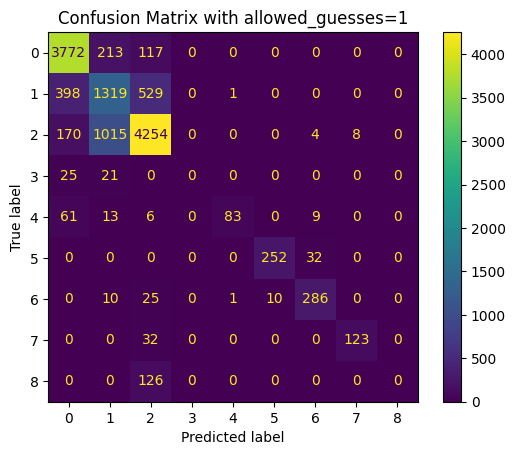

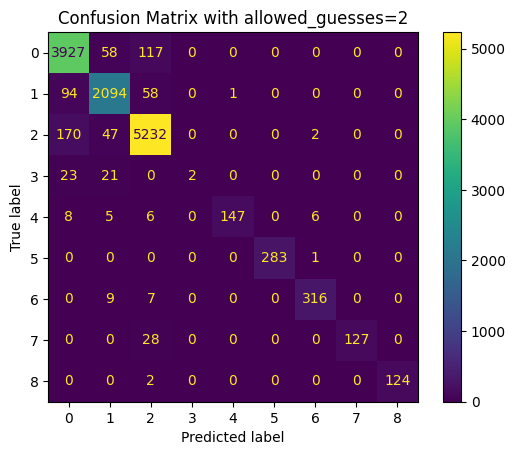

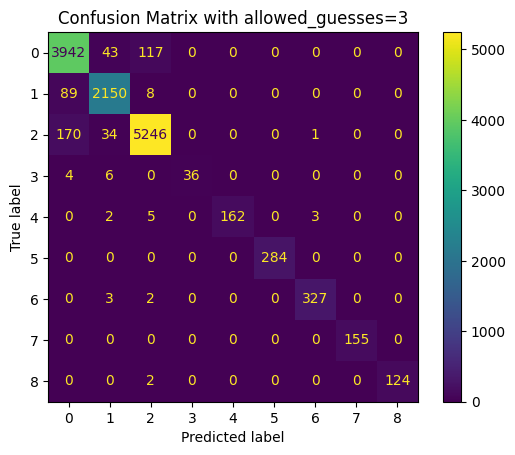

In [36]:
"""
MyVoter: Train dataset predictions
"""
trained_models = np.array([
    MyTrainedModel(nn1, num_classes, train_X1), 
    MyTrainedModel(nn2, num_classes, train_X1),
    MyTrainedModel(nn3, num_classes, train_X1),
    MyTrainedModel(linear1, num_classes, train_X1), 
    MyTrainedModel(linear2, num_classes, train_X2), 
    MyTrainedModel(linear3, num_classes, train_X3), 
    ])

voter = MyVoter(trained_models, num_classes, train_y, "voter1", "train.csv")
voter.set_probs()
voter.save_csv()
# voter.set_weights(weights=weights)
acc = voter.get_acc()
models_acc = voter.get_models_acc()

print("MyVoter: Train Dataset (before extra voter nn)")
print(acc); print()
for m in models_acc: print(m); print()
voter.diplay_confusion_matrix(1)
voter.diplay_confusion_matrix(2)
voter.diplay_confusion_matrix(3)


MyVoter: Test Dataset (before extra voter nn)
[0.76122573 0.93992718 0.95782767 0.97451456 0.97724515 0.9839199
 1.         1.         1.        ]

[0.77548544 0.94842233 0.99332524 0.99787621 1.         1.
 1.         1.         1.        ]

[0.76425971 0.95145631 0.98604369 0.99332524 0.9993932  1.
 1.         1.         1.        ]

[0.76334951 0.9535801  0.98877427 0.99635922 0.9993932  1.
 1.         1.         1.        ]

[0.63592233 0.80309466 0.90867718 0.95600728 0.9690534  0.97876214
 0.99271845 1.         1.        ]

[0.63683252 0.7976335  0.90867718 0.95570388 0.97026699 0.97876214
 0.99271845 1.         1.        ]

[0.63592233 0.80036408 0.90746359 0.95145631 0.96632282 0.97876214
 0.99271845 1.         1.        ]



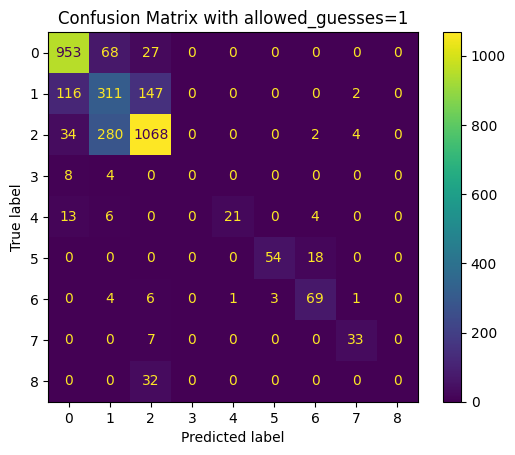

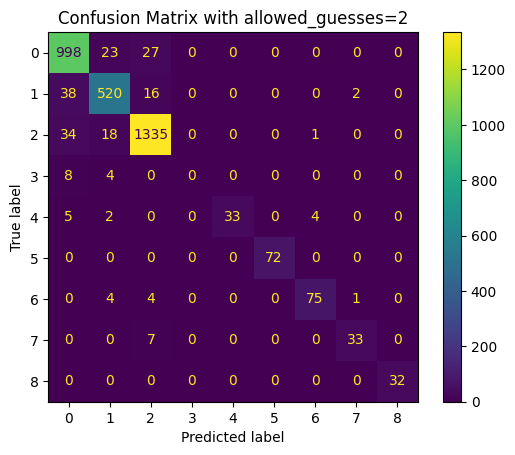

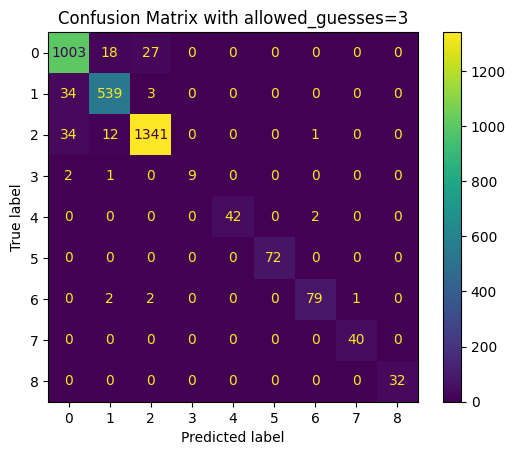

In [39]:
"""
MyVoter: Test dataset predictions
"""
trained_models = np.array([
    MyTrainedModel(nn1, num_classes, test_X1), 
    MyTrainedModel(nn2, num_classes, test_X1),
    MyTrainedModel(nn3, num_classes, test_X1),
    MyTrainedModel(linear1, num_classes, test_X1), 
    MyTrainedModel(linear2, num_classes, test_X2), 
    MyTrainedModel(linear3, num_classes, test_X3), 
    ])

voter = MyVoter(trained_models, num_classes, test_y, "voter1", "test.csv")
voter.set_probs()
voter.save_csv()
# voter.set_weights(weights=weights)
acc = voter.get_acc()
models_acc = voter.get_models_acc()

print("MyVoter: Test Dataset (before extra voter nn)")
print(acc); print()
for m in models_acc: print(m); print()
voter.diplay_confusion_matrix(1)
voter.diplay_confusion_matrix(2)
voter.diplay_confusion_matrix(3)

💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type             | Params | Mode 
--------------------------------------------------------
0 | model_body | Sequential       | 17.7 K | train
1 | loss_fn    | CrossEntropyLoss | 0      | train
--------------------------------------------------------
17.7 K    Trainable params
0         Non-trainable params
17.7 K    Total params
0.071     Total estimated model params size (MB)
9         Modules in train mode
0         Modules in eval mode
c:\Users\ericc\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:433: The 'train_dataloader' does not have many w

Epoch 4: 100%|██████████| 808/808 [00:06<00:00, 134.04it/s, v_num=6, train_acc=0.333]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 808/808 [00:06<00:00, 133.78it/s, v_num=6, train_acc=0.333]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
c:\Users\ericc\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:433: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.



Fit Time (s): 29.131948232650757
voter_nn   54
done
Testing DataLoader 0: 100%|██████████| 206/206 [00:00<00:00, 281.55it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.7663834691047668
        test_loss           0.5651149749755859
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Test Time (s): 0.7489123344421387


<Figure size 1600x1600 with 0 Axes>

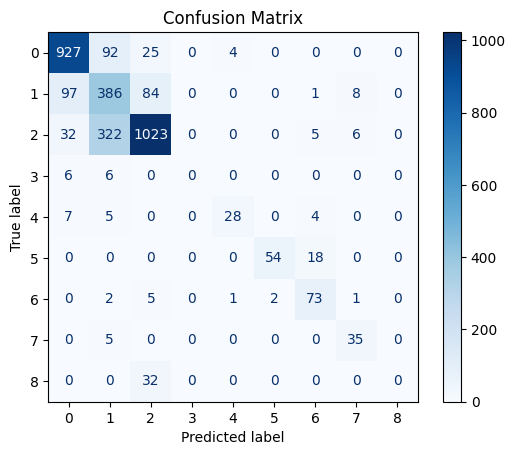

Logger Metics:  logs\voter_nn\version_6\metrics.csv


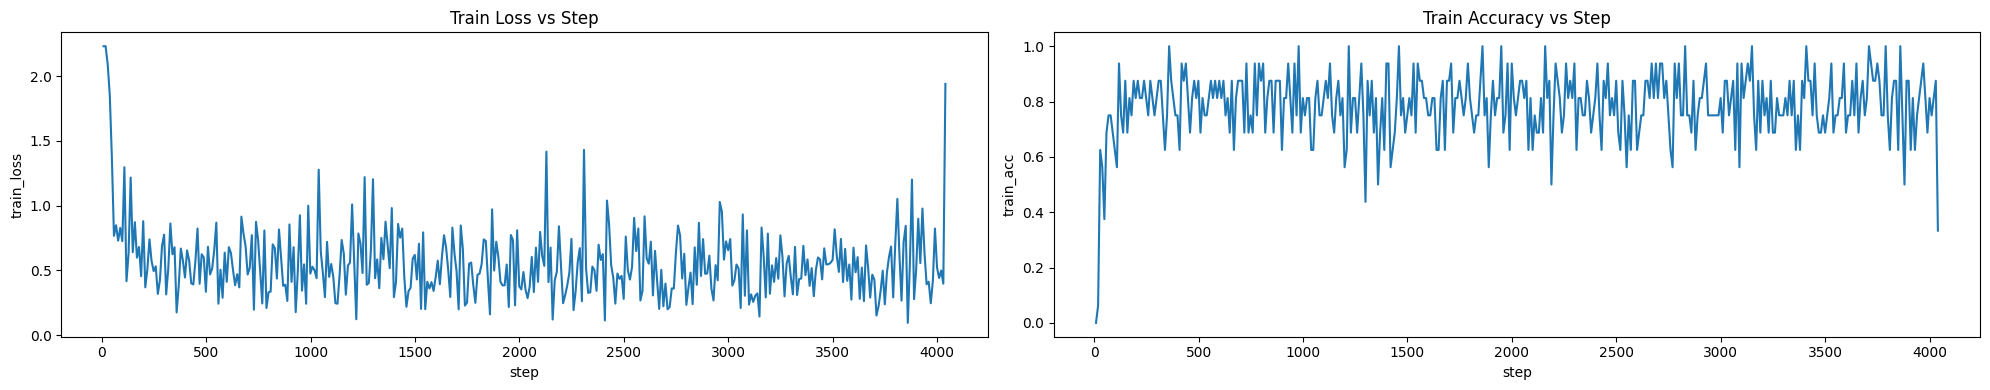

In [40]:
"""
NN to take the generated probabilities (WARNING weights are not added to stored data in my_voter) and determine the final class
"""

train_voter_filepath = "my_data/my_voter/voter1/train.csv"
test_voter_filepath = "my_data/my_voter/voter1/test.csv"

train_loader = MyDataset.get_loader([train_voter_filepath], shuffle=True, batch_size=16, num_workers=0)
test_loader = MyDataset.get_loader([test_voter_filepath], batch_size=16, num_workers=0)

max_epochs = 5
model_name = "voter_nn"
num_features = train_loader.dataset.datasets[0].num_features
model_body = nn.Sequential(
    nn.Linear(num_features, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, num_classes))
loss_fn = nn.CrossEntropyLoss()
voter_nn = MyNN(model_name, max_epochs, num_classes, num_features, model_body, loss_fn)
voter_nn.fit(train_loader)
print(model_name, " ", num_features)
print("done")

voter_nn.test(test_loader)
voter_nn.display_confusion_matrix(test_loader, num_classes)
voter_nn.plot_logger()



